In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert (0,'../../_module1_/_functions_')
from Functions_EDA import *

ModuleNotFoundError: No module named 'Functions_EDA'

In [ ]:
path = 'supermarket_clean.csv'
market = pd.read_csv(path, encoding='utf-8', parse_dates=['date', 'time'])

In [ ]:
market.info()

In [ ]:
market.sample(8)

In [ ]:
market.time = market.time.dt.strftime('%H:%M')

In [ ]:
market['year'] = market['date'].dt.year
market['month'] = market['date'].dt.month
print(f'Year: {market.year.unique()}')
print(f'Months: {market.month.unique()}')

In [ ]:
market['month'] = market['month'].replace({1:'January', 2:'February', 3:'March'})

In [3]:
market

NameError: name 'market' is not defined

# 1. Which product group made the biggest sales?

Regardless of the expense

In [20]:
market.groupby(['product_line'])['quantity', 'total', 'gross_income'].sum()

,quantity,total,gross_income
product_line,,,
Electronic accessories,971,54337.5315,2587.5015
Fashion accessories,872,51203.2500,2438.2500
Food and beverages,942,55110.3840,2624.3040
Health and beauty,854,49193.7390,2342.5590
Home and lifestyle,871,49789.6980,2370.9380
Sports and travel,910,54120.7065,2577.1765


In [21]:
prod_sales = pd.DataFrame(market.groupby(['product_line'])['quantity', 'total', 'gross_income'].sum())
prod_sales

,quantity,total,gross_income
product_line,,,
Electronic accessories,971,54337.5315,2587.5015
Fashion accessories,872,51203.2500,2438.2500
Food and beverages,942,55110.3840,2624.3040
Health and beauty,854,49193.7390,2342.5590
Home and lifestyle,871,49789.6980,2370.9380
Sports and travel,910,54120.7065,2577.1765


In [22]:
marketpt = market.pivot_table(index='product_line', columns ='month', values=['quantity', 'total', 'gross_income'], aggfunc='sum', margins=True, margins_name='Sum')
order = ['quantity', 'total', 'gross_income']
marketpt = marketpt[order]
marketpt

quantity                           total              \
month                  February January March   Sum    February     January   
product_line                                                                  
Electronic accessories      313     333   325   971  17362.9050   18831.288   
Fashion accessories         265     336   271   872  15907.2165   19345.116   
Food and beverages          349     315   278   942  20000.3580   18536.070   
Health and beauty           266     254   334   854  14602.2555   16383.171   
Home and lifestyle          205     312   354   871  12434.3835   17445.015   
Sports and travel           226     365   319   910  13809.6105   20664.903   
Sum                        1624    1915  1881  5420  94116.7290  111205.563   

                                                 gross_income            \
month                         March          Sum     February   January   
product_line                                                              
Electronic accessories   18143.3385   54337.5315     826.8050   896.728   
Fashion accessories      15950.9175   51203.2500     757.4865   921.196   
Food and beverages       16573.9560   55110.3840     952.3980   882.670   
Health and beauty        18208.3125   49193.7390     695.3455   780.151   
Home and lifestyle       19910.2995   49789.6980     592.1135   830.715   
Sports and travel        19646.1930   54120.7065     657.6005   984.043   
Sum                     108433.0170  313755.3090    4481.7490  5295.503   

                                               
month                       March         Sum  
product_line                                   
Electronic accessories   863.9685   2587.5015  
Fashion accessories      759.5675   2438.2500  
Food and beverages       789.2360   2624.3040  
Health and beauty        867.0625   2342.5590  
Home and lifestyle       948.1095   2370.9380  
Sports and travel        935.5330   2577.1765  
Sum                     5163.4770  14940.7290

In [23]:
pt = market.groupby(['product_line'])['total'].sum()
pt2 = pd.DataFrame(pt)
percentages = pt / pt.sum() * 100
product_total = pd.DataFrame({'total values': pt, 'percentage': percentages})
product_total

,total values,percentage
product_line,,
Electronic accessories,54337.5315,17.318442
Fashion accessories,51203.2500,16.319485
Food and beverages,55110.3840,17.564765
Health and beauty,49193.7390,15.679014
Home and lifestyle,49789.6980,15.868958
Sports and travel,54120.7065,17.249336


In [24]:
pt2

,total
product_line,
Electronic accessories,54337.5315
Fashion accessories,51203.2500
Food and beverages,55110.3840
Health and beauty,49193.7390
Home and lifestyle,49789.6980
Sports and travel,54120.7065


Using pandas

In [25]:
clr = px.colors.qualitative.swatches()
clr.show()

In [26]:
rgb= [(217,175,107),(175,100,88),(115,111,76)]
normalrgb = [[c / 255.0 for c in rgb] for rgb in rgb]

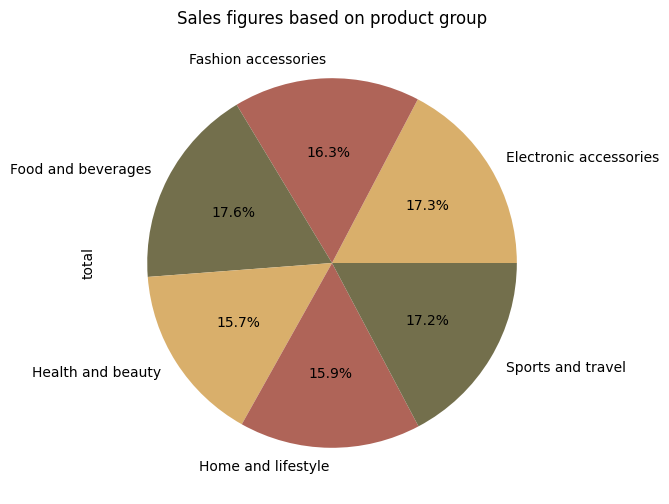

In [27]:
pt.plot.pie(figsize=(6,6), autopct='%1.1f%%', colors = normalrgb)
plt.title('Sales figures based on product group')

Using seaborn

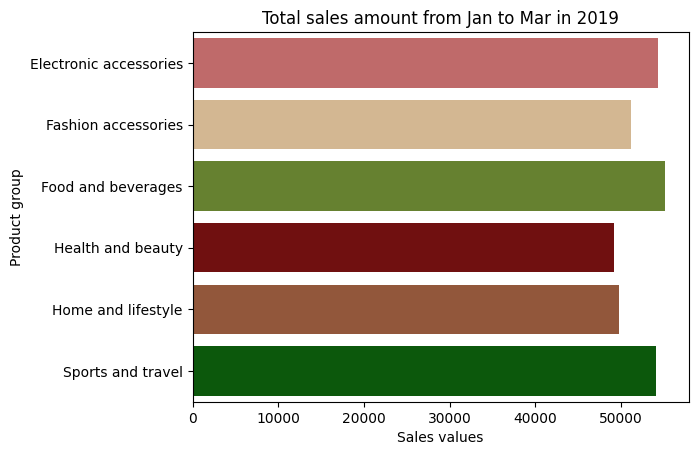

In [59]:
sns.barplot(y = prod_sales.index, x = prod_sales['total'], palette=rgb4)
plt.title('Total sales amount from Jan to Mar in 2019')
plt.ylabel('Product group')
plt.xlabel('Sales values')
plt.show()

Using plotly express

In [29]:
rgb2 = [px.colors.qualitative.Antique[i] for i in [2, 1, 3]]

In [30]:
fig1= px.pie(pt2, values='total', 
             title='Sales figures based on product group',
             names = pt2.index,
             color_discrete_sequence = rgb2)
# Styling 
fig1.update_layout(title={'text': 'Sales figures based on product group',
                    'font': {'color': 'black', 'size': 18}}, title_x=0.5, title_y=0.95,
                  font_color='black')

fig1.update_traces(textinfo='percent+label', textposition='outside', textfont_size=14,
                  marker=dict(colors=rgb2, line=dict(color='#000000', width=2)))
                 
fig1.show()
#fig.write_html("idoia.html")

In [31]:
fig12= px.bar(prod_sales, y = prod_sales.index, 
                 x = ['quantity','total', 'gross_income'], 
                 color_discrete_sequence = rgb2)

# Step 2: Update the layout of the plot

# hide and lock down axes
#fig.update_yaxes(visible=False, fixedrange=True)
fig12.update_layout(title={'text': 'Sales Overview by Product Group',
                    'font': {'color': 'black', 'size': 18}},
                    title_x=0.5, title_y=0.95, xaxis_title='Values', 
                    yaxis_title='Product group', plot_bgcolor='rgba(0,0,0,0)', 
                    paper_bgcolor='rgba(0,0,0,0)', barmode='group', legend_title_text='',
                   font_color='black')

fig12.show()

Using matplotlib

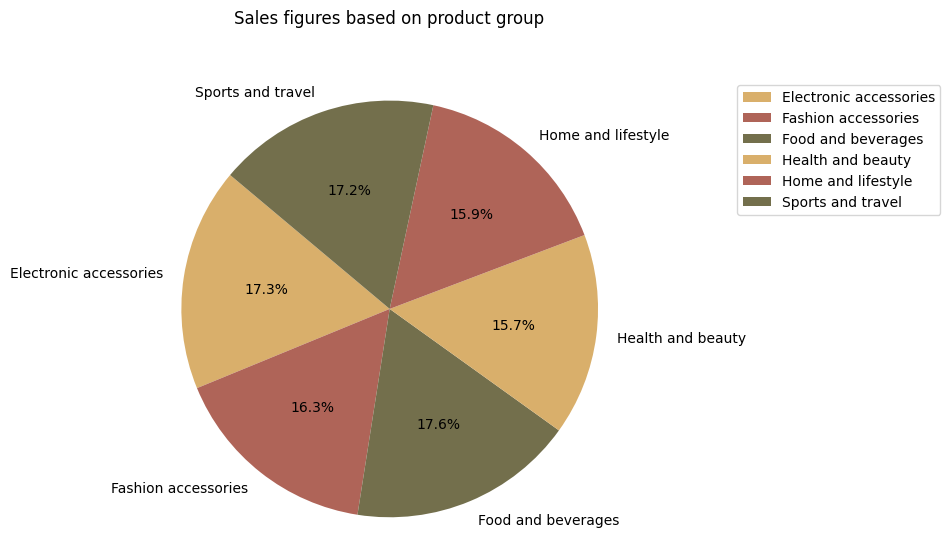

In [32]:
plt.figure(figsize=(6, 6))
plt.pie(pt2['total'], labels=pt2.index, colors=normalrgb, autopct='%1.1f%%', startangle=140)
plt.title('Sales figures based on product group', loc='center', y=1.1)  # Centered title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper right', labels=pt2.index, bbox_to_anchor=(1.7, 1))

In [33]:
rgb3 = ['indianred','burlywood','olivedrab']

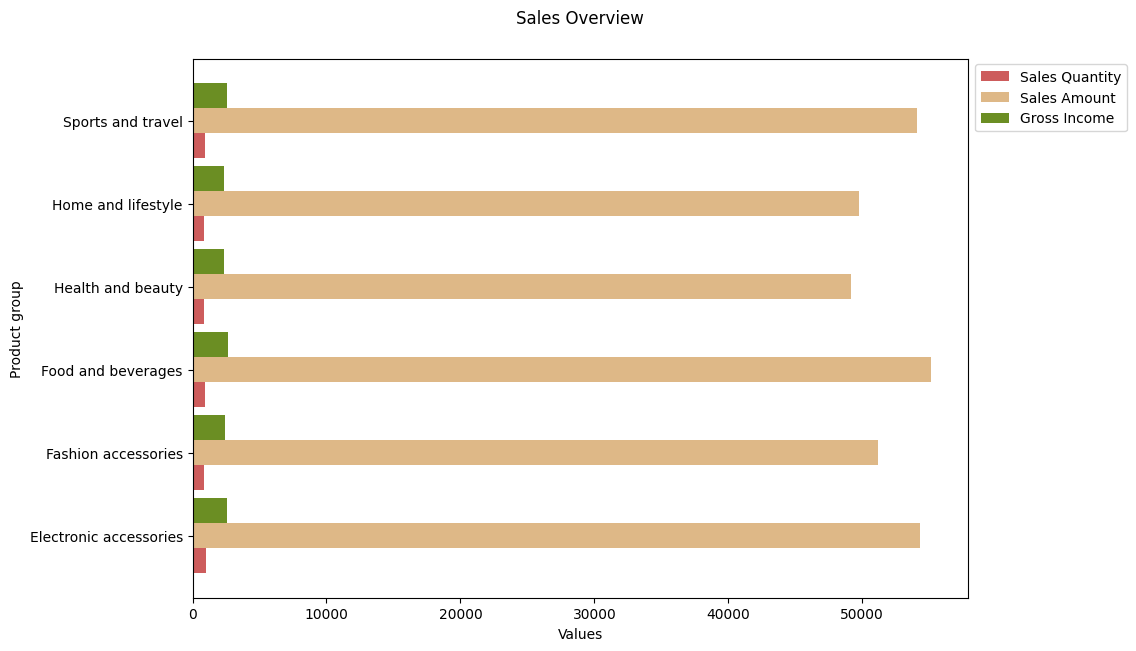

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.3
index = np.arange(len(prod_sales.index))
bars1 = ax.barh(index, prod_sales['quantity'], bar_width, label='Sales Quantity', color='indianred')
bars2 = ax.barh(index + bar_width, prod_sales['total'], bar_width, label='Sales Amount', color='burlywood')
bars3 = ax.barh(index + 2 * bar_width, prod_sales['gross_income'], bar_width, label='Gross Income', color='olivedrab')
ax.set_yticks(index + bar_width)
ax.set_yticklabels(prod_sales.index)
ax.set_xlabel('Values')
ax.set_ylabel('Product group')
ax.set_title('Sales Overview',y=1.05)
ax.legend(loc=(1.01, 0.865))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
plt.show()

Answer:
Food & beverages ranks as the most sold product group in January - March 2019.

# 2. Does the supermarket have seasonal goods?

In [35]:
market['month_int'] = market['month'].replace({'January':1, 'February':2, 'March':3})
market

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,invoice_length,year,month,month_int
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,11,2019,January,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,11,2019,March,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,11,2019,March,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,11,2019,January,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,11,2019,February,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,11:40,Ewallet,60.95,4.761905,3.0475,5.9,11,2019,February,2
987,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,11,2019,January,1
988,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,11,2019,February,2
989,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,11,2019,February,2


In [36]:
marketseason= market.filter(items=['product_line', 'date', 'month', 'total', 'month_int']).sort_values(by='date')
marketseason

,product_line,date,month,total,month_int
848,Food and beverages,2019-01-01,January,177.4080,1
690,Sports and travel,2019-01-01,January,113.5680,1
445,Electronic accessories,2019-01-01,January,470.6730,1
831,Sports and travel,2019-01-01,January,184.0860,1
17,Sports and travel,2019-01-01,January,457.4430,1
...,...,...,...,...,...
875,Home and lifestyle,2019-03-30,March,216.8460,3
955,Electronic accessories,2019-03-30,March,304.9830,3
929,Sports and travel,2019-03-30,March,469.7700,3
304,Sports and travel,2019-03-30,March,295.6905,3


In [37]:
marketseason2 = market.pivot_table(index='product_line', columns ='month', values=['total'], aggfunc='sum')
marketseason2 = pd.DataFrame(marketseason2)
marketseason2.columns = marketseason2.columns.get_level_values(1)
marketseason2 = marketseason2.reset_index()
marketseason_long = marketseason2.melt(id_vars='product_line', var_name='month', value_name='total')
marketseason_long
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
marketseason_long['month'] = pd.Categorical(marketseason_long['month'], categories=month_order, ordered=True)
marketseason_long = marketseason_long.sort_values(by='month')
marketseason_long

,product_line,month,total
8,Food and beverages,January,18536.0700
11,Sports and travel,January,20664.9030
10,Home and lifestyle,January,17445.0150
9,Health and beauty,January,16383.1710
7,Fashion accessories,January,19345.1160
6,Electronic accessories,January,18831.2880
0,Electronic accessories,February,17362.9050
4,Home and lifestyle,February,12434.3835
3,Health and beauty,February,14602.2555
2,Food and beverages,February,20000.3580


In [38]:
rgb4 = ['indianred','burlywood','olivedrab','maroon','sienna','darkgreen']

In [39]:
fig2 = px.line(marketseason_long, x='month', y='total', color='product_line',
               color_discrete_sequence = rgb4,
              hover_name="product_line")
fig2.update_layout(title={'text': 'Monthly Sales Figures',
                    'font': {'color': 'black', 'size': 18}},
                   plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', xaxis_title='Month', 
                    yaxis_title='Total sales', font_color='black', title_x=0.45, title_y=0.95)
fig2.show()

In [86]:
marketseason_short = marketseason_long.groupby(['product_line','month'])['total'].agg('sum')
marketseason_short = marketseason_short.reset_index()
marketseason_short = marketseason_short[marketseason_short['month'].isin(['January','February','March'])]
marketseason_short['month_int'] = marketseason_short['month'].replace({'January':1,'February': 2,'March':3})
marketseason_short

,product_line,month,total,month_int
0,Electronic accessories,January,18831.2880,1
1,Electronic accessories,February,17362.9050,2
2,Electronic accessories,March,18143.3385,3
12,Fashion accessories,January,19345.1160,1
13,Fashion accessories,February,15907.2165,2
14,Fashion accessories,March,15950.9175,3
24,Food and beverages,January,18536.0700,1
25,Food and beverages,February,20000.3580,2
26,Food and beverages,March,16573.9560,3
36,Health and beauty,January,16383.1710,1


In [98]:
fig22= px.scatter(marketseason_short, x="month_int", y="total", color= "product_line",
                  color_discrete_sequence=rgb4, size='total',size_max=10,
                  trendline='lowess',hover_name='product_line')
fig22.update_layout(title={'text': 'Monthly Sales Figures Distribution',
                    'font': {'color': 'black', 'size': 18}},
                   plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', xaxis_title='Month', 
                    yaxis_title='Total sales', font_color='black', title_x=0.45, title_y=0.95)
month_map = { 1: "January", 2: "February", 3: "March"}
fig22.update_xaxes(
    tickmode='array',
    tickvals=[1, 2, 3],
    ticktext=["January", "February", "March"])
fig22.show()

Answer: It cannot be confirmed if there are potentially seasonal goods as the dataset does not have records of the whole year.
However, we can see irregularities of the sales figures of each product line. In Feb, food & bev increased, could be valentine.

# 3. Which city obtained the most income from sales?

In [247]:
market

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,payment,cogs,gross_margin_percentage,gross_income,rating,invoice_length,year,month,month_int,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,11,2019,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,11,2019,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,11,2019,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,11,2019,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,11,2019,February,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,Ewallet,60.95,4.761905,3.0475,5.9,11,2019,February,2,11
987,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,11,2019,January,1,13
988,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,11,2019,February,2,13
989,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,11,2019,February,2,15


In [248]:
marketcity = market.groupby(['city'])['total','cogs','gross_income', 'gross_margin_percentage'].agg({'total':'sum',
            'cogs': 'sum','gross_income': 'sum','gross_margin_percentage':'mean'})
marketcity = pd.DataFrame(marketcity)
marketcity = marketcity.reset_index()
marketcity

,city,total,cogs,gross_income,gross_margin_percentage
0,Mandalay,104152.7970,99193.14,4959.6570,4.761905
1,Naypyitaw,104441.4315,99468.03,4973.4015,4.761905
2,Yangon,105161.0805,100153.41,5007.6705,4.761905


In [249]:
marketcity['net'] = marketcity['total'] - marketcity['cogs']

In [269]:
marketcity['color'] = ['A', 'B', 'C']

In [408]:
marketcity

,city,total,cogs,gross_income,gross_margin_percentage,net,latitude,longitude,color
0,Mandalay,104152.7970,99193.14,4959.6570,4.761905,4959.6570,21.959683,96.094874,A
1,Naypyitaw,104441.4315,99468.03,4973.4015,4.761905,4973.4015,19.754005,96.134498,B
2,Yangon,105161.0805,100153.41,5007.6705,4.761905,5007.6705,16.796713,96.160992,C


In [32]:
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [33]:
geolocator = Nominatim(user_agent="my_app")

In [413]:
def geocode_city(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return geocode_city(city)  # retry in case of timeout

In [414]:
marketcity['latitude'], marketcity['longitude'] = zip(*marketcity['city'].apply(geocode_city))

In [415]:
marketcity = marketcity.dropna()

In [416]:
fig3= px.scatter_mapbox(marketcity, lat="latitude", lon="longitude", hover_name="city",
                        size="gross_income", zoom=5, height=600, color='city', 
                        color_discrete_sequence = ['indianred','burlywood','olivedrab'])
fig3.update_layout(mapbox_style="open-street-map",
                   title={'text': 'Gross Income in Different Stores',
                    'font': {'color': 'black', 'size': 18}}, showlegend=True, 
                   legend_title_text='City', font_color='black', title_x=0.5, title_y=0.95)
fig3.show()

In [398]:
fig32= px.scatter_mapbox(marketcity, lat="latitude", lon="longitude", hover_name="city",
                        size="net", zoom=5, height=600, color='color', 
                         color_discrete_sequence = ['indianred','burlywood','olivedrab'])
fig32.update_layout(mapbox_style="carto-positron")
fig32.update_layout(title={'text': 'Gross Income in Different Stores','font': {'color': 'black', 'size': 18}}, 
                    font_color='black', title_x=0.5, title_y=0.95, showlegend=False)
fig32.show()

In [392]:
fig33= px.bar(marketcity, x='city', y=['total', 'cogs', 'gross_income'],
             hover_name="city",color_discrete_sequence = ['burlywood','darkolivegreen','indianred'])
fig33.update_layout(title={'text': 'Revenue & Cost Figures','font': {'color': 'black', 'size': 18}},
                    title_x=0.5, title_y=0.95, xaxis_title='City', 
                    yaxis_title='Figures', plot_bgcolor='rgba(0,0,0,0)', 
                    paper_bgcolor='rgba(0,0,0,0)', barmode='group', legend_title_text='',font_color='black' )
fig33.show()

Answer: Based on provided data (total sales & cost of goods sold), Yangon has the most gross income of the three recorded cities. However, the income gap among them is not very dramatic. 

# 4. When did the busiest sales transaction happen?

In [288]:
market

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,payment,cogs,gross_margin_percentage,gross_income,rating,invoice_length,year,month,month_int,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,11,2019,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,11,2019,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,11,2019,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,11,2019,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,11,2019,February,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,Ewallet,60.95,4.761905,3.0475,5.9,11,2019,February,2,11
987,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,11,2019,January,1,13
988,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,11,2019,February,2,13
989,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,11,2019,February,2,15


In [289]:
market['time'] = pd.to_datetime(market['time'])

In [290]:
market['hour'] = market.time.dt.strftime('%H')

In [291]:
markethour = market.groupby(['hour'])['total'].count().reset_index()
markethour

,hour,total
0,10,101
1,11,90
2,12,89
3,13,99
4,14,82
5,15,102
6,16,75
7,17,73
8,18,93
9,19,113


In [345]:
rgb5=['indianred','burlywood','olivedrab','maroon','sienna','darkgreen','crimson','brown','darkolivegreen','tomato']

In [460]:
fig4=px.treemap(markethour, path=['hour'], values='total', color_continuous_midpoint=50,
                color_discrete_sequence=rgb5)
fig4.update_layout(title={'text': 'Transactions Frequency by Hour','font': {'color': 'black', 'size': 18}},
                   font_color='black', title_x=0.5, title_y=0.86, margin = dict(t=50, l=25, r=25, b=25))
fig4.update_traces(texttemplate='<b>%{label}</b>', textfont=dict(size=25, color='white'), 
                    textposition='middle center', marker_line_color='black')
fig4.show()

In [347]:
markettime = market.groupby(['month','hour'])['total'].count()
markettime = markettime.reset_index()
markettime

,month,hour,total
0,February,10,36
1,February,11,29
2,February,12,28
3,February,13,23
4,February,14,23
5,February,15,36
6,February,16,22
7,February,17,23
8,February,18,34
9,February,19,26


In [461]:
fig42=px.treemap(markettime, path=['month','hour'], values='total', color_continuous_midpoint=50, color_discrete_sequence=rgb4)
fig42.update_layout(title={'text': 'Transactions Frequency by Month-Hour','font': {'color': 'black', 'size': 18}},
                   font_color='black',title_x=0.5, title_y=0.86, margin = dict(t=50, l=25, r=25, b=25))
fig42.update_traces(texttemplate='<b>%{label}</b>', textfont=dict(size=25, color='white'), 
                    textposition='middle center', marker_line_color='black')
fig42.show()

In [349]:
markettimecity = market.groupby(['city','month','hour'])['total'].count()
markettimecity = markettimecity.reset_index()
markettimecity

,city,month,hour,total
0,Mandalay,February,10,9
1,Mandalay,February,11,12
2,Mandalay,February,12,10
3,Mandalay,February,13,10
4,Mandalay,February,14,9
...,...,...,...,...
94,Yangon,March,16,12
95,Yangon,March,17,6
96,Yangon,March,18,11
97,Yangon,March,19,15


In [350]:
markettimecity.city.unique()

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [464]:
fig43 = px.treemap(markettimecity, path=['city','month','hour'], values='total', color_continuous_midpoint=50,
                  color_discrete_sequence=rgb5)
fig43.update_layout(title={'text': 'Transactions Frequency by City','font': {'color': 'black', 'size': 18}},
                     title_x=0.5, title_y=0.9, margin = dict(t=50, l=25, r=25, b=25))
fig43.update_traces(texttemplate='<b>%{label}</b>', textfont=dict(size=15, color='white'),
                    textposition='middle center',marker_line_color='black')
fig43.show()

Answer:
* On the hourly basis, the busiest time is around 7 PM, with 113 sales transactions in total.
* On the monthly basis, the busiest time is around March, 7 PM, with 52 sales transactions in total.
* On the geographical basis, Yangon store is the busiest in January at 11AM, Mandalay store in March at 7PM, and Naypyitaw in March at 7PM and Feb at 10AM.

# 5. Who are the customers and how does their purchase behavior look?

In [54]:
market

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,payment,cogs,gross_margin_percentage,gross_income,rating,invoice_length,year,month,month_int,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,11,2019,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,11,2019,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,11,2019,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,11,2019,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,11,2019,February,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,Ewallet,60.95,4.761905,3.0475,5.9,11,2019,February,2,11
987,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,11,2019,January,1,13
988,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,11,2019,February,2,13
989,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,11,2019,February,2,15


In [55]:
custmode1 = market.groupby(['gender', 'customer_type'])['total'].agg(['sum','count','mean']).reset_index()
custmode1

,gender,customer_type,sum,count,mean
0,Female,Member,85049.1285,258,329.647785
1,Female,Normal,76688.9865,237,323.582222
2,Male,Member,76076.5005,240,316.985419
3,Male,Normal,75940.6935,256,296.643334


In [56]:
male_sales = market.query('gender == "Male"')['total']
female_sales = market.query('gender == "Female"')['total']

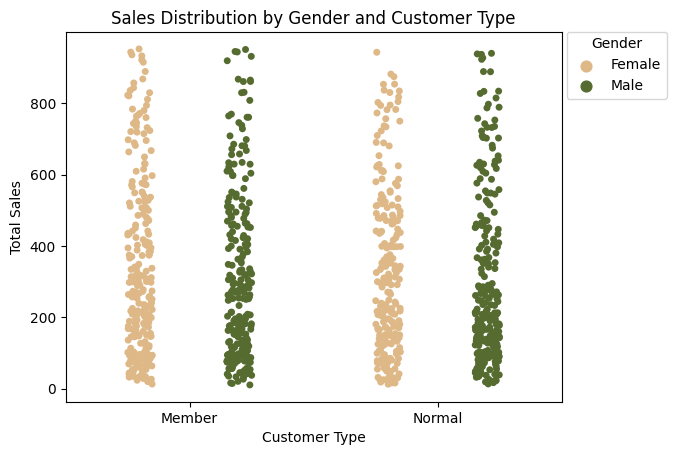

In [465]:
palette = {'Male':'darkolivegreen', 'Female': 'burlywood'}
sns.stripplot(data=market, x='customer_type', y='total', hue='gender', palette=palette, 
            jitter=True, dodge=True)
plt.title('Sales Distribution by Gender and Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.legend(title='Gender', loc=(1.01,0.82))
plt.show()

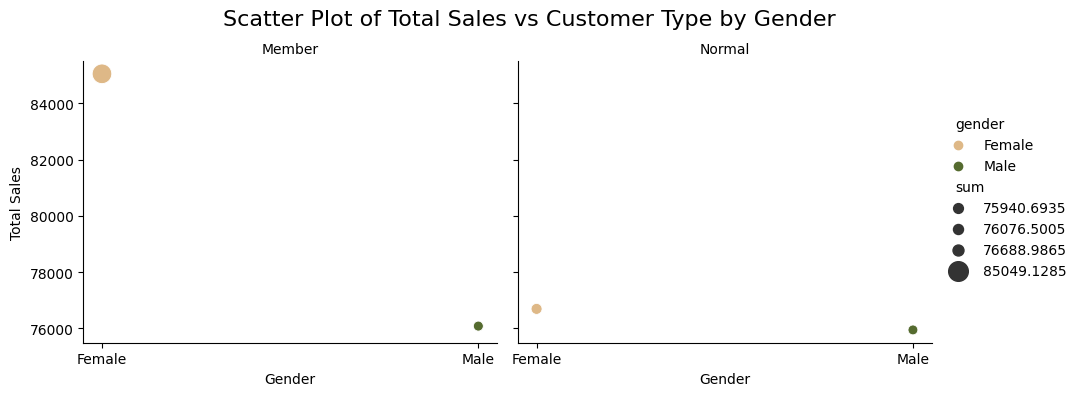

In [312]:
plot = sns.relplot(data=custmode1, y='sum', x='gender', hue='gender', col='customer_type', kind='scatter', 
            palette=palette, height=4, aspect=1.2, sizes=(50, 200), size='sum')
plot.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
plot.set_axis_labels('Gender', 'Total Sales')
plt.suptitle('Scatter Plot of Total Sales vs Customer Type by Gender', fontsize=16)
plt.show()

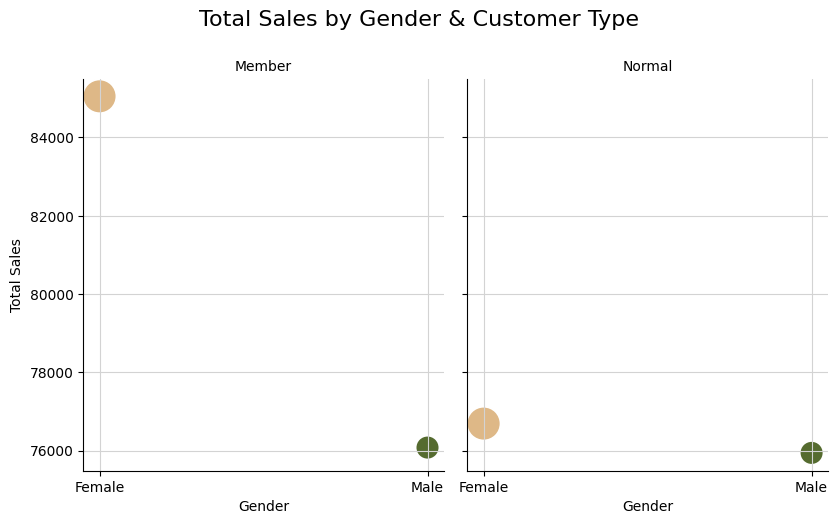

In [313]:
g = sns.FacetGrid(custmode1, col='customer_type', height=5.3, aspect=0.8)
g.map_dataframe(sns.scatterplot, x='gender', y='sum', hue='gender', palette=palette, 
                sizes=(300, 600), size='sum', alpha=1, edgecolor='w')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Gender', 'Total Sales')
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Sales by Gender & Customer Type', fontsize=16)
g.fig.patch.set_facecolor('white')  # Set background color of the entire figure
for ax in g.axes.flat:
    ax.grid(True, color='lightgrey')  # Enable grid for each subplot
    ax.set_facecolor('white')
plt.show()

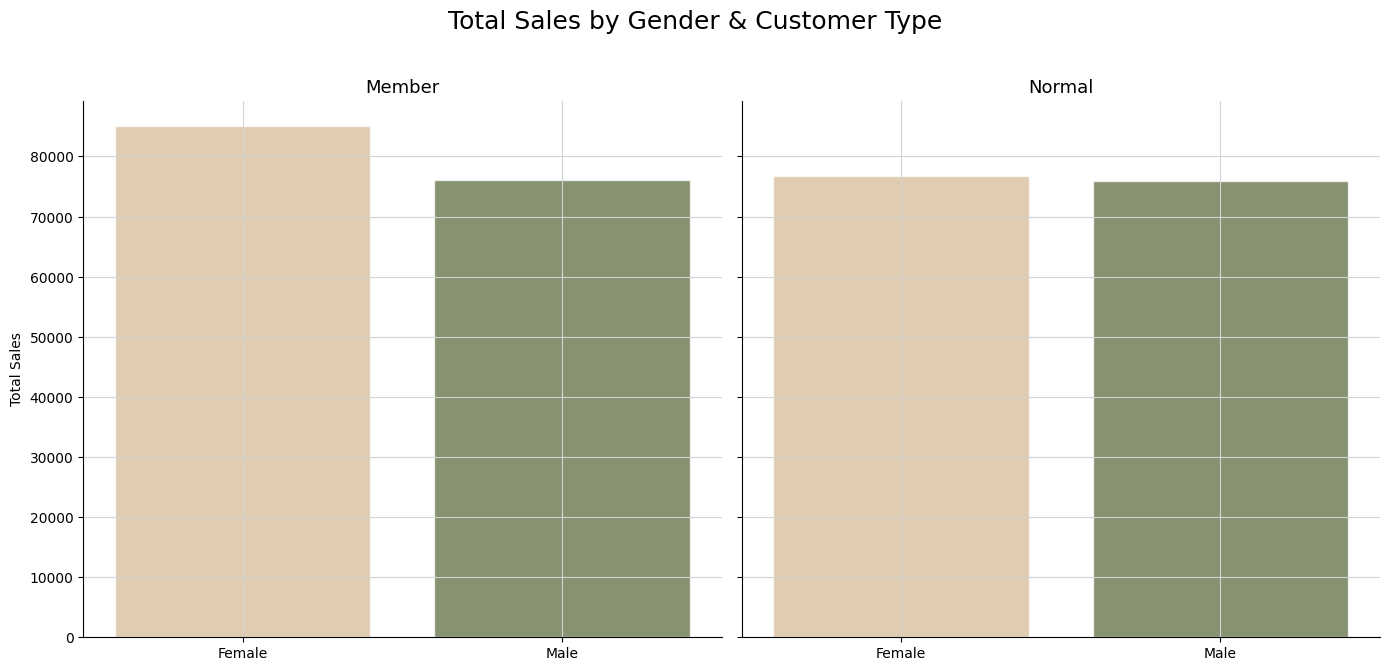

In [314]:
g2 = sns.FacetGrid(custmode1, col='customer_type', hue='gender', 
                       margin_titles=True, palette=palette, size=7)
g2.map(sns.barplot, 'gender', 'sum', palette=palette,
       alpha=0.7, edgecolor='w', hue_order=np.unique(custmode1['gender']),order=['Female', 'Male'])
g2.set_titles(col_template="{col_name}",size=13)
g2.set_axis_labels('', 'Total Sales')
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Sales by Gender & Customer Type', fontsize=18)
g2.fig.patch.set_facecolor('white')  # Set background color of the entire figure
for ax in g2.axes.flat:
    ax.grid(True, color='lightgrey')  # Enable grid for each subplot
    ax.set_facecolor('white')
plt.show()

In [315]:
fig5= px.scatter(custmode1, x='gender', y='sum', color='gender', facet_col='customer_type',
                 color_discrete_map=palette, symbol='gender', symbol_map={'Male': 'circle', 'Female': 'diamond'},
                 symbol_sequence=['circle', 'diamond'], opacity=0.8, size='sum', size_max=10)
fig5.update_layout(title='Total Sales Comparison by Gender and Customer Type', title_font_size=16,
                  plot_bgcolor= 'rgba(0, 0, 0, 0)', paper_bgcolor= 'rgba(0, 0, 0, 0)', 
                   xaxis=dict(showgrid=True, gridcolor='rgba(0, 0, 0, 0.1)'),
                   yaxis=dict(showgrid=True, gridcolor='rgba(0, 0, 0, 0.1)'),
                   xaxis2=dict(showgrid=True, gridcolor='rgba(0, 0, 0, 0.1)'),
                   yaxis2=dict(showgrid=True, gridcolor='rgba(0, 0, 0, 0.1)'))
fig5.update_xaxes(title_text='Gender')
fig5.update_yaxes(title_text='Total Sales')
fig5.show()

> **Female member customers spend the most in the store and male non-member customers the least.**

In [316]:
custmode2 = market.pivot_table(index = 'product_line', columns = ['gender', 'customer_type'], values='total', aggfunc='sum')
custmode2 = custmode2.reset_index()
custmode2 = custmode2.melt(id_vars='product_line', var_name=['gender', 'customer_type'], value_name='total')
custmode2

,product_line,gender,customer_type,total
0,Electronic accessories,Female,Member,11153.5515
1,Fashion accessories,Female,Member,13059.3015
2,Food and beverages,Female,Member,18564.3465
3,Health and beauty,Female,Member,8379.3885
4,Home and lifestyle,Female,Member,17234.3220
5,Sports and travel,Female,Member,16658.2185
6,Electronic accessories,Female,Normal,15948.4710
7,Fashion accessories,Female,Normal,15314.7435
8,Food and beverages,Female,Normal,13572.1110
9,Health and beauty,Female,Normal,10181.5980


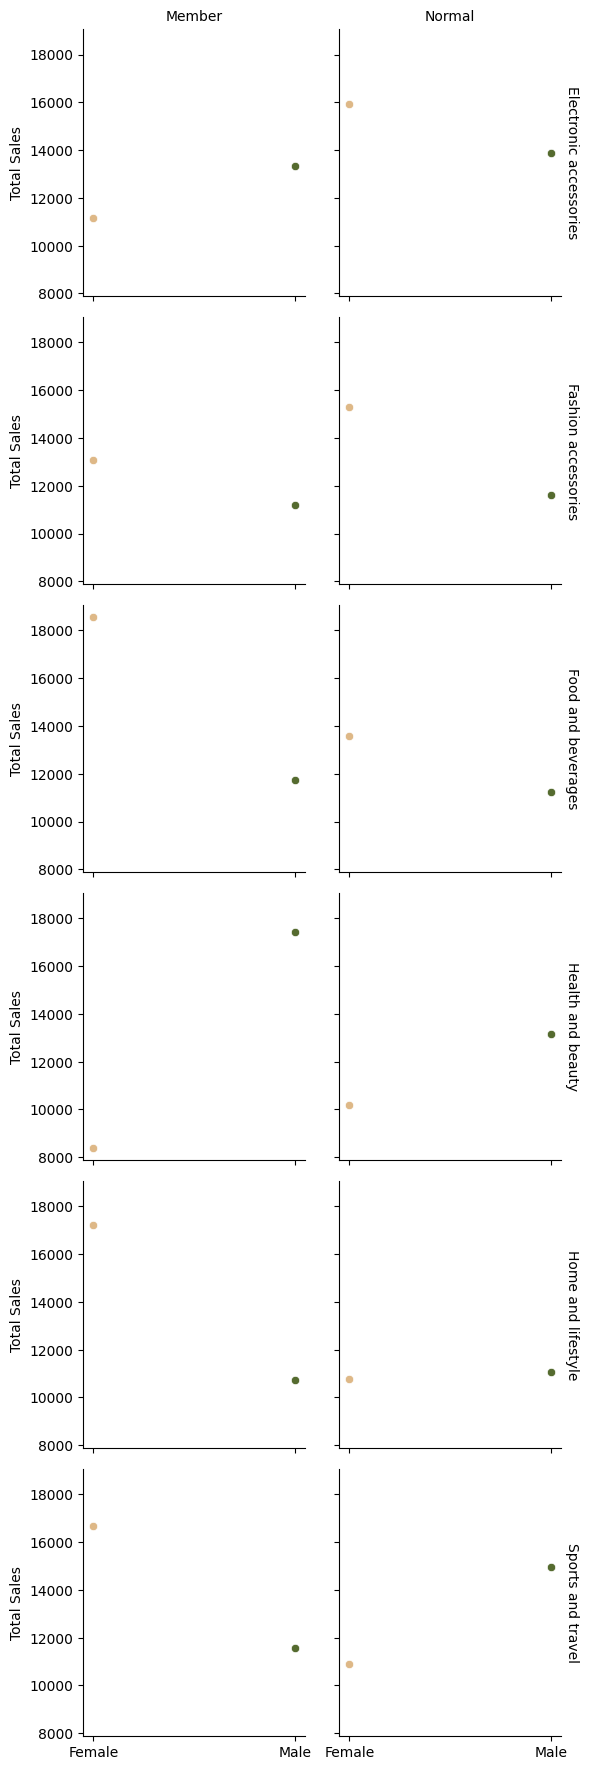

In [317]:
fig521 = sns.FacetGrid(custmode2, row='product_line', col='customer_type', hue='gender', margin_titles=True, palette=palette)
fig521.map(sns.scatterplot, 'gender', 'total')
fig521.set_titles(row_template="{row_name}", col_template="{col_name}")
fig521.set_axis_labels("", "Total Sales")
plt.show()

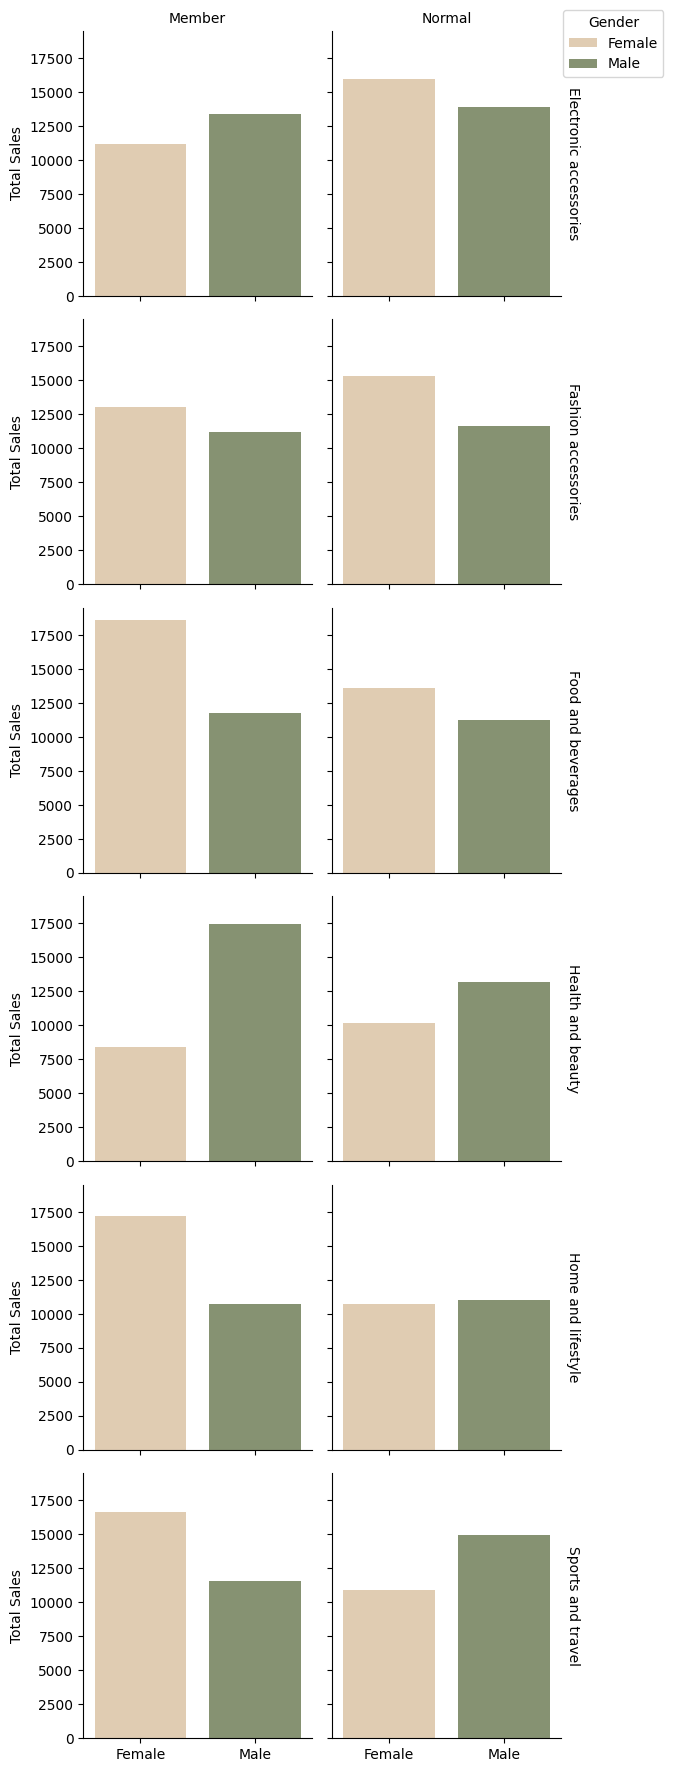

In [509]:
fig523 = sns.FacetGrid(custmode2, row='product_line', col='customer_type', hue='gender', 
                       margin_titles=True, palette=palette)
fig523.map(sns.barplot, 'gender', 'total', hue_order=np.unique(custmode2['gender']),order=['Female', 'Male'],
           alpha=0.7, dodge=True)
fig523.set_titles(row_template="{row_name}", col_template="{col_name}")
fig523.set_axis_labels("", "Total Sales")
plt.legend(title='Gender', loc=(1.01,6.27))
plt.show()

In [496]:
custmode21 = custmode2[custmode2['product_line'].isin(["Health and beauty", "Home and lifestyle", "Sports and travel"])]
custmode21 = custmode21.reset_index()
custmode21

,index,product_line,gender,customer_type,total
0,3,Health and beauty,Female,Member,8379.3885
1,4,Home and lifestyle,Female,Member,17234.3220
2,5,Sports and travel,Female,Member,16658.2185
3,9,Health and beauty,Female,Normal,10181.5980
4,10,Home and lifestyle,Female,Normal,10757.6805
5,11,Sports and travel,Female,Normal,10914.3825
6,15,Health and beauty,Male,Member,17451.6510
7,16,Home and lifestyle,Male,Member,10743.7050
8,17,Sports and travel,Male,Member,11576.0820
9,21,Health and beauty,Male,Normal,13181.1015


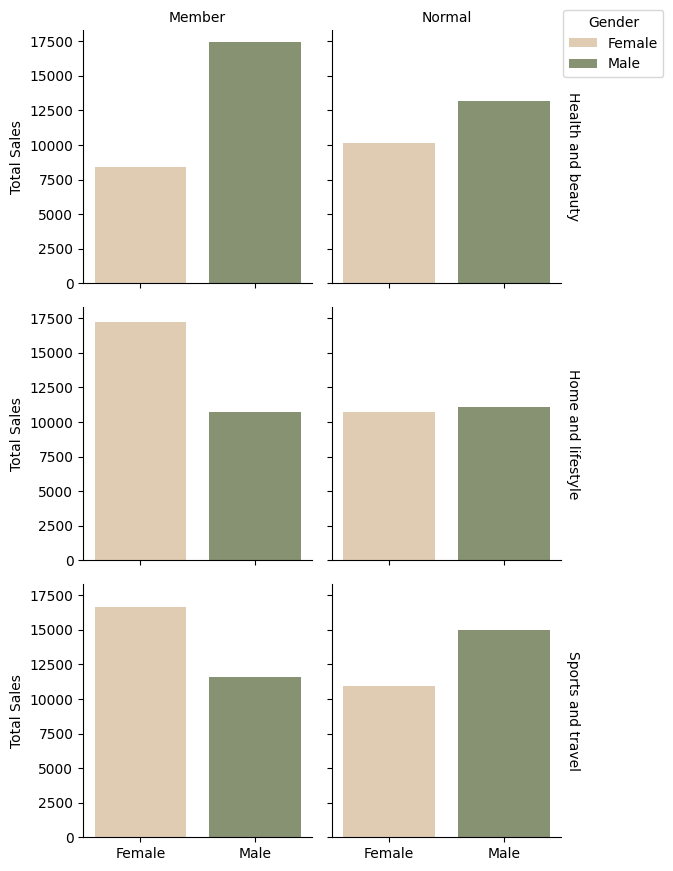

In [500]:
fig5231 = sns.FacetGrid(custmode21, row='product_line', col='customer_type', hue='gender', 
                       margin_titles=True, palette=palette)
fig5231.map(sns.barplot, 'gender', 'total', hue_order=np.unique(custmode21['gender']),order=['Female', 'Male'],
           alpha=0.7, dodge=True)
fig5231.set_titles(row_template="{row_name}", col_template="{col_name}")
fig5231.set_axis_labels("", "Total Sales")
plt.legend(title='Gender', loc=(1.01,3))
plt.show()

>* Female member customers buy food & beverages the most, while female non-member buy electronics accessories the most.
>* Male member customers buy health & beauty the most, and male non-member buy sports & travel.

In [320]:
custmode3 = market.pivot_table(index = 'payment', columns = ['gender'], values='total',aggfunc='sum')
custmode3 = custmode3.reset_index()
custmode3 = custmode3.melt(id_vars='payment',var_name=['gender'], value_name='total')
custmode3male = custmode3.query('gender=="Male"')
custmode3male

,payment,gender,total
3,Cash,Male,51688.770
4,Credit card,Male,46229.337
5,Ewallet,Male,54099.087


In [378]:
colorcombo3 = ['olivedrab','darkolivegreen','yellowgreen']

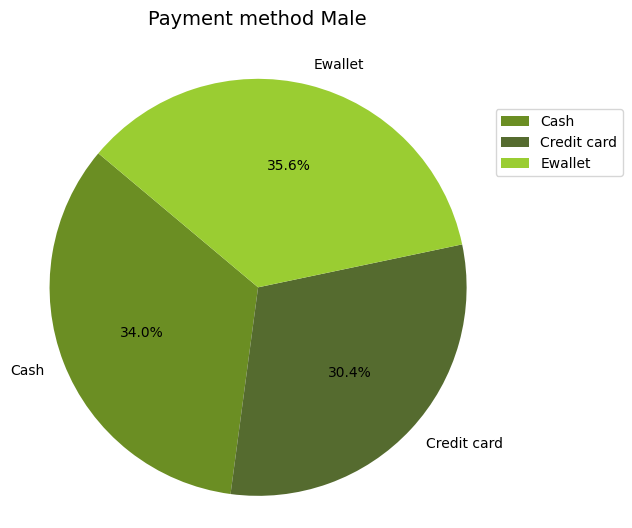

In [379]:
plt.figure(figsize=(6, 6))
plt.pie(custmode3male['total'], labels=custmode3male.payment, colors=colorcombo3, autopct='%1.1f%%', startangle=140)
plt.title('Payment method Male', loc='center', y=1.05, size=14)  # Centered title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper right', labels=custmode3male.payment, bbox_to_anchor=(1.3, 0.9))

In [375]:
colorcombo32 = ['indianred','maroon','lightcoral']

In [376]:
custmode3female = custmode3.query('gender=="Female"')
custmode3female

,payment,gender,total
0,Cash,Female,58512.090
1,Credit card,Female,50412.705
2,Ewallet,Female,52813.320


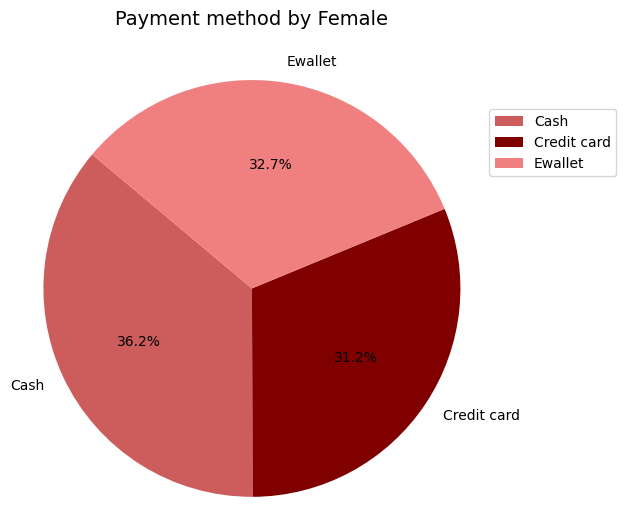

In [377]:
plt.figure(figsize=(6, 6))
plt.pie(custmode3female['total'], labels=custmode3female.payment, colors=colorcombo32, autopct='%1.1f%%', startangle=140)
plt.title('Payment method by Female', loc='center', y=1.05, size=14)  # Centered title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper right', labels=custmode3female.payment, bbox_to_anchor=(1.3, 0.9))

> **Male customers pay more with Ewallet, and female with cash.**

In [384]:
custmode4 = market.pivot_table(index='payment', columns=['customer_type'], values='total', aggfunc='sum')
custmode4 = custmode4.reset_index()
custmode4 = custmode4.melt(id_vars='payment',var_name=['customer_type'], value_name='total')
custmode4member= custmode4.query('customer_type=="Member"')
custmode4member

,payment,customer_type,total
0,Cash,Member,54661.0155
1,Credit card,Member,55708.1175
2,Ewallet,Member,50756.4960


In [387]:
colorcombo4= ['indianred','burlywood','darkolivegreen']

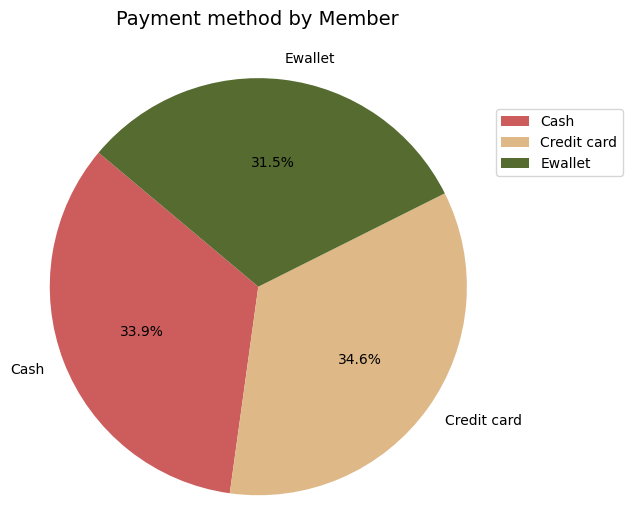

In [388]:
plt.figure(figsize=(6, 6))
plt.pie(custmode4member['total'], labels=custmode4member.payment, colors=colorcombo4, autopct='%1.1f%%', startangle=140)
plt.title('Payment method by Member', loc='center', y=1.05, size=14)  # Centered title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper right', labels=custmode4member.payment, bbox_to_anchor=(1.3, 0.9))

In [389]:
custmode4normal= custmode4.query('customer_type=="Normal"')
custmode4normal

,payment,customer_type,total
3,Cash,Normal,55539.8445
4,Credit card,Normal,40933.9245
5,Ewallet,Normal,56155.9110


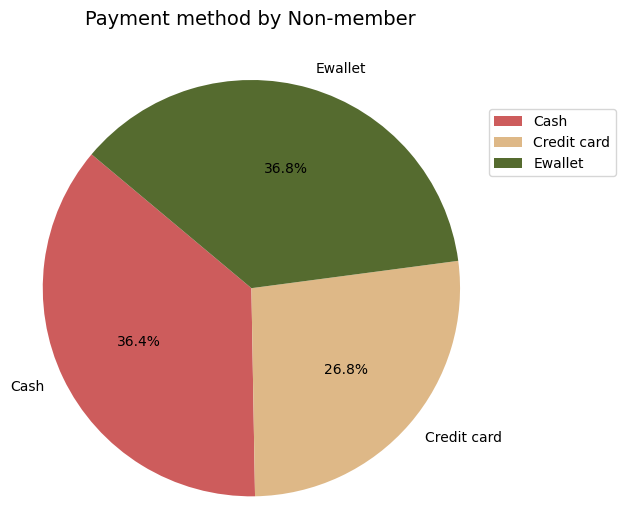

In [390]:
plt.figure(figsize=(6, 6))
plt.pie(custmode4normal['total'], labels=custmode4normal.payment, colors=colorcombo4, autopct='%1.1f%%', startangle=140)
plt.title('Payment method by Non-member', loc='center', y=1.05, size=14)  # Centered title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper right', labels=custmode4normal.payment, bbox_to_anchor=(1.3, 0.9))

> **A pattern that is visible from the data is that customers that have become member are more likely to opt for credit card, but non-member opt for e-wallet.**

In [391]:
custmode5 = market.groupby(['gender', 'month'])['total'].agg(['sum', 'mean'])
custmode5 = custmode5.reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
custmode5['month'] = pd.Categorical(custmode5['month'], categories=month_order, ordered=True)
custmode5 = custmode5.sort_values(by='month')
custmode5 = pd.DataFrame(custmode5)
custmode5

,gender,month,sum,mean
1,Female,January,56080.0170,324.161948
4,Male,January,55125.5460,316.813483
0,Female,February,54272.2005,335.013583
3,Male,February,39844.5285,288.728467
2,Female,March,51385.8975,321.161859
5,Male,March,57047.1195,310.038693


In [184]:
custmode6 = market.groupby(['month', 'customer_type'])['total'].agg(['sum', 'mean'])
custmode6 = custmode6.reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
custmode6['month'] = pd.Categorical(custmode6['month'], categories=month_order, ordered=True)
custmode6 = custmode6.sort_values(by='month')
custmode6 = pd.DataFrame(custmode6)
custmode6

,month,customer_type,sum,mean
2,January,Member,56880.369,332.633737
3,January,Normal,54325.194,308.665875
0,February,Member,48232.695,299.581957
1,February,Normal,45884.034,330.100964
4,March,Member,56012.565,337.425090
5,March,Normal,52420.452,294.496921


> **When compared, the biggest monthly income of the store was steadily made by female customer's purchase.**
> **And between member and non-member, monthly income's share of member is bigger than non-member.**